# **Stock Market Prediction and Forecasting using Stacked LSTM**

In [1]:
#using keras and tensorflow

In [11]:
#Data Collection
import pandas_datareader as pdr

In [12]:
key = '0fd52ed6ff4942ab6ae94a0b0cd72add481f9d43'
df = pdr.get_data_tiingo('AAPL',api_key=key)


<ipython-input-12-eb12c31c8bec>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key=key)


In [15]:
df.to_csv('AAPL.csv')

In [16]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-10-22 00:00:00+00:00  220.65  223.36  218.94  219.79  28792082   
       2018-10-23 00:00:00+00:00  222.73  223.25  214.70  215.83  38767846   
       2018-10-24 00:00:00+00:00  215.09  224.23  214.54  222.60  40925163   
       2018-10-25 00:00:00+00:00  219.80  221.38  216.75  217.71  29855768   
       2018-10-26 00:00:00+00:00  216.30  220.19  212.67  215.90  47258375   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-10-22 00:00:00+00:00  52.827106  53.475923  52.417705  52.621209   
       2018-10-23 00:00:00+00:00  53.325091  53.449587  51.402582  51.673122   
       2018-10-24 00:00:00+00:00  51.495954  53.684215  51.364275  53.293967   
       2018-10-25 00:00:00+00:00  52.623603  53.001880  51.893384  52.123224   
       2018-10-26 00:00:00+00:00  51.785647  52.716975  50.916568  51.689881   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-10-22 00:00:00+00:00  115168328      0.0          1.0  
       2018-10-23 00:00:00+00:00  155071384      0.0          1.0  
       2018-10-24 00:00:00+00:00  163700652      0.0          1.0  
       2018-10-25 00:00:00+00:00  119423072      0.0          1.0  
       2018-10-26 00:00:00+00:00  189033500      0.0          1.0

In [14]:
import pandas as pd

In [17]:
df.tail()

close     high     low     open    volume  \
symbol date                                                                    
AAPL   2023-10-12 00:00:00+00:00  180.71  182.340  179.04  180.070  56743119   
       2023-10-13 00:00:00+00:00  178.85  181.930  178.14  181.420  51456082   
       2023-10-16 00:00:00+00:00  178.72  179.075  176.51  176.750  52516984   
       2023-10-17 00:00:00+00:00  177.15  178.420  174.80  176.645  57549350   
       2023-10-18 00:00:00+00:00  175.84  177.575  175.11  175.580  54764375   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2023-10-12 00:00:00+00:00    180.71  182.340  179.04  180.070   
       2023-10-13 00:00:00+00:00    178.85  181.930  178.14  181.420   
       2023-10-16 00:00:00+00:00    178.72  179.075  176.51  176.750   
       2023-10-17 00:00:00+00:00    177.15  178.420  174.80  176.645   
       2023-10-18 00:00:00+00:00    175.84  177.575  175.11  175.580   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-10-12 00:00:00+00:00   56743119      0.0          1.0  
       2023-10-13 00:00:00+00:00   51456082      0.0          1.0  
       2023-10-16 00:00:00+00:00   52516984      0.0          1.0  
       2023-10-17 00:00:00+00:00   57549350      0.0          1.0  
       2023-10-18 00:00:00+00:00   54764375      0.0          1.0

In [21]:
#taking close column and for that we are performing stock prediction
df1 = df.reset_index()['close']

In [22]:
df1.shape

(1256,)

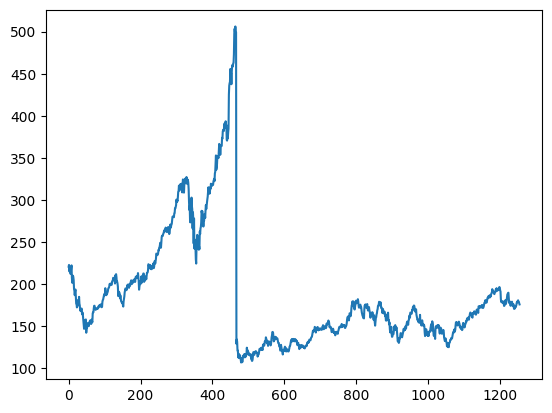

In [23]:
#plotting this close data frame
import matplotlib.pyplot as plt
plt.plot(df1)

In [24]:
#LSTM being sensitive to the scale of data hence applying MinMax scalar
#transforming values between 0 to 1


In [25]:
import numpy as np

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
#df1 will be converted into an array with values 0 to 1
df1

array([[0.28505949],
       [0.29026925],
       [0.27113338],
       ...,
       [0.18003757],
       [0.1761052 ],
       [0.17282405]])

In [29]:
#splitting dataset into train and test set
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(816, 440)

In [31]:
import numpy
#converting an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY =[],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [32]:
#reshape into X=t,t+1,t+2... and Y=t+4
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [33]:
print(x_train)

[[0.28505949 0.29026925 0.27113338 ... 0.1925861  0.19857232 0.20333125]
 [0.29026925 0.27113338 0.28293049 ... 0.19857232 0.20333125 0.19959925]
 [0.27113338 0.28293049 0.27416406 ... 0.20333125 0.19959925 0.2036819 ]
 ...
 [0.10356919 0.10737633 0.10715091 ... 0.16363181 0.1636819  0.17092048]
 [0.10737633 0.10715091 0.10399499 ... 0.1636819  0.17092048 0.17204759]
 [0.10715091 0.10399499 0.10194114 ... 0.17092048 0.17204759 0.1636819 ]]


In [34]:
print(x_train.shape)

(715, 100)


In [35]:
#reshaping input to be [samples,time steps, features] as per the LSTM requirement
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [37]:
#creating the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 453ms/step - loss: 0.0415 - val_loss: 0.0015
Epoch 2/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0129 - val_loss: 8.8916e-04
Epoch 3/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0112 - val_loss: 0.0013
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0089 - val_loss: 3.3469e-04
Epoch 5/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0080 - val_loss: 3.2088e-04
Epoch 6/100
12/12 [==============================] - 5s 399ms/step - loss: 0.0081 - val_loss: 0.0010
Epoch 7/100
12/12 [==============================] - 3s 209ms/step - loss: 0.0067 - val_loss: 8.1503e-04
Epoch 8/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 9/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0055 - val_loss: 2.6224e-04
Epoch 10/100
12/12 [==============================] - 3s 275ms/step - 

In [42]:
import tensorflow as tf

In [43]:
tf.__version__

'2.13.0'

In [44]:
#prediction and performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 37ms/step


In [45]:
#transform back to original form -- reverse scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [46]:
#calculating RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

224.54362620661595

In [47]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

161.420401686747

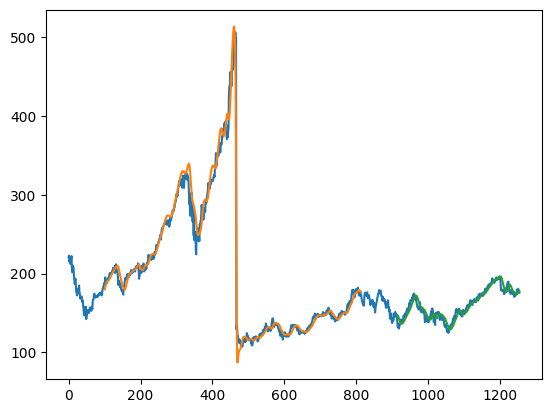

In [49]:
#plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
#plotting baseline and predcitions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
#predicting future 30 days


In [51]:
len(test_data)

440

In [54]:
x_input=test_data[340:].reshape(1,-1)

In [55]:
x_input.shape

(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
#demonstrating prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i=i+1


In [59]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df1)

1256

In [62]:
df3=df1.tolist()
df3.extend(lst_output)

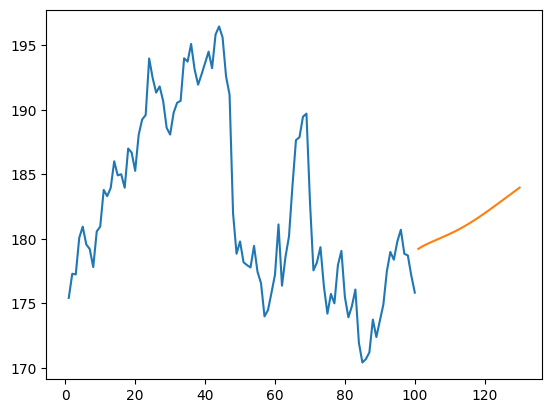

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

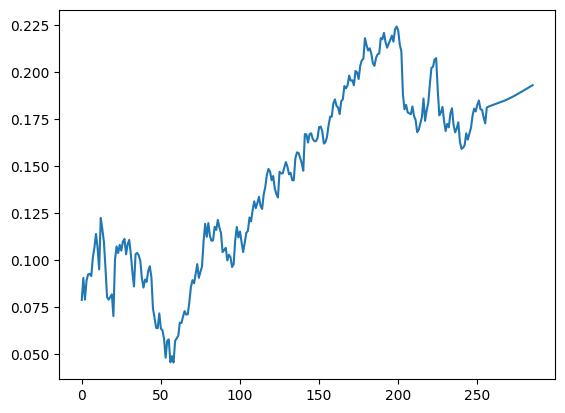

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])